In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [ ]:
all_targets = ['seven', 'eight', 'tree', 'no', 'off', 'four', 'right', 'happy', 'one', 'marvin', 'bird', 'wow', 'stop', 'dog', 'up', 'two', 'on', 'backward', 'nine', 'go', 'zero', 'three', 'six', 'left', 'learn', 'five', 'follow', 'sheila', 'house', 'bed', 'visual', 'cat', 'forward', 'down', 'yes']

In [ ]:
feature_sets_path = './'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'speech_model.h5'

In [ ]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [ ]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [ ]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77548, 16, 16)
(9659, 16, 16)
(9649, 16, 16)


In [ ]:
# Peek at labels
print(y_val)

[16. 34. 15. ... 15. 22.  6.]


In [ ]:
right_word_index = all_targets.index('right')
left_word_index = all_targets.index('left')
forward_word_index = all_targets.index('forward')
backward_word_index = all_targets.index('backward')
stop_word_index = all_targets.index('stop')
mask_right = y_train==right_word_index
mask_left = y_train==left_word_index
mask_forward = y_train==forward_word_index
mask_backward = y_train==backward_word_index
mask_stop = y_train==stop_word_index

In [ ]:
y_train.fill(0)
y_train[mask_right]=1
y_train[mask_left]=2
y_train[mask_forward]=3
y_train[mask_backward]=4
y_train[mask_stop]=5

In [ ]:
mask_right = y_val==right_word_index
mask_left = y_val==left_word_index
mask_forward = y_val==forward_word_index
mask_backward = y_val==backward_word_index
mask_stop = y_val==stop_word_index

In [ ]:
y_val.fill(0)
y_val[mask_right]=1
y_val[mask_left]=2
y_val[mask_forward]=3
y_val[mask_backward]=4
y_val[mask_stop]=5

In [ ]:
mask_right = y_test==right_word_index
mask_left = y_test==left_word_index
mask_forward = y_test==forward_word_index
mask_backward = y_test==backward_word_index
mask_stop = y_test==stop_word_index

In [ ]:
y_test.fill(0)
y_test[mask_right]=1
y_test[mask_left]=2
y_test[mask_forward]=3
y_test[mask_backward]=4
y_test[mask_stop]=5

In [ ]:
y_train=y_train.reshape(-1,1)
y_val=y_val.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
# Peek at labels after conversion
print(y_val)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
# View the dimensions of our input data
print(x_train.shape)

(77548, 16, 16, 1)


In [ ]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77548, 16, 16, 1)
(9659, 16, 16, 1)
(9649, 16, 16, 1)


In [ ]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [ ]:
model = models.Sequential()


In [ ]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
# model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
x_train.shape

(77548, 16, 16, 1)

In [ ]:
y_train.reshape(-1,1)

array([[2.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
# Display model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [ ]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
776/776 [==============================] - 4s 5ms/step - loss: 0.4966 - acc: 0.8722 - val_loss: 0.3668 - val_acc: 0.8920
Epoch 2/30
776/776 [==============================] - 3s 4ms/step - loss: 0.3209 - acc: 0.9051 - val_loss: 0.2599 - val_acc: 0.9222
Epoch 3/30
776/776 [==============================] - 4s 5ms/step - loss: 0.2664 - acc: 0.9210 - val_loss: 0.2948 - val_acc: 0.9183
Epoch 4/30
776/776 [==============================] - 4s 5ms/step - loss: 0.2390 - acc: 0.9286 - val_loss: 0.2440 - val_acc: 0.9272
Epoch 5/30
776/776 [==============================] - 4s 5ms/step - loss: 0.2221 - acc: 0.9339 - val_loss: 0.2202 - val_acc: 0.9339
Epoch 6/30
776/776 [==============================] - 3s 4ms/step - loss: 0.2114 - acc: 0.9374 - val_loss: 0.2058 - val_acc: 0.9411
Epoch 7/30
776/776 [==============================] - 4s 5ms/step - loss: 0.2036 - acc: 0.9398 - val_loss: 0.2024 - val_acc: 0.9420
Epoch 8/30
776/776 [==============================] - 3s 4ms/step - loss: 0.

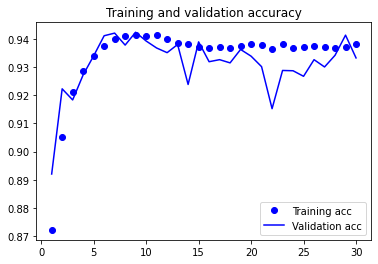

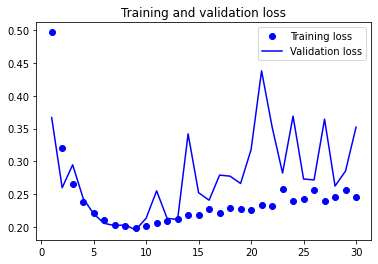

In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the model as a file
models.save_model(model, model_filename)

In [ ]:
for i in range(0, 110):
    print(' i:',i, 'Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

 i: 0 Answer: [0.]  Prediction: [[0.9213007  0.01108923 0.02051378 0.00337046 0.00884287 0.03488306]]
 i: 1 Answer: [0.]  Prediction: [[9.7327435e-01 3.3565285e-03 6.3474807e-03 8.6973212e-04 1.9147131e-03
  1.4237153e-02]]
 i: 2 Answer: [0.]  Prediction: [[9.7207379e-01 2.1992177e-03 4.2024208e-03 3.9785504e-04 8.1323192e-04
  2.0313511e-02]]
 i: 3 Answer: [0.]  Prediction: [[9.3822920e-01 2.1138730e-02 1.0027214e-02 5.5843229e-05 2.9971929e-02
  5.7704333e-04]]
 i: 4 Answer: [0.]  Prediction: [[9.8893309e-01 3.0144502e-03 5.5571727e-04 1.4725455e-05 7.4818917e-03
  1.1626075e-07]]
 i: 5 Answer: [0.]  Prediction: [[9.8294616e-01 1.9474684e-11 9.8068838e-11 1.6877810e-02 1.0833565e-08
  1.7597094e-04]]
 i: 6 Answer: [0.]  Prediction: [[0.9230439  0.00553639 0.01219514 0.00396644 0.0039065  0.05135163]]
 i: 7 Answer: [0.]  Prediction: [[9.9777716e-01 2.2121142e-03 7.3761817e-06 4.3657817e-08 3.3686122e-06
  9.9016884e-09]]
 i: 8 Answer: [0.]  Prediction: [[5.5439299e-01 6.2364265e-06 8.

In [ ]:
y_test[64]

array([1.])